In [1]:
import sys
import datetime
import os

import numpy as np
import cv2
from tqdm import tqdm

from train import cellConfig
from mrcnn import utils
from mrcnn import model as modellib
import time

from itertools import groupby
from operator import itemgetter

import operator
import skimage
import matplotlib.pyplot as plt

/home/slin/miniconda3/envs/Usiigaci/lib/python3.5/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/slin/miniconda3/envs/Usiigaci/lib/python3.5/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/slin/miniconda3/envs/Usiigaci/lib/python3.5/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/slin/miniconda3/

In [2]:
%matplotlib inline

In [3]:
DATA_DIR = 'hela_sliced/'
images = sorted([file for file in os.listdir(DATA_DIR) if '.tif' in file])
print(images)

['image_id_000.tif', 'image_id_001.tif', 'image_id_002.tif', 'image_id_003.tif', 'image_id_004.tif', 'image_id_005.tif', 'image_id_006.tif', 'image_id_007.tif', 'image_id_008.tif', 'image_id_009.tif', 'image_id_010.tif', 'image_id_011.tif', 'image_id_012.tif', 'image_id_013.tif', 'image_id_014.tif', 'image_id_015.tif', 'image_id_016.tif', 'image_id_017.tif', 'image_id_018.tif', 'image_id_019.tif', 'image_id_020.tif', 'image_id_021.tif', 'image_id_022.tif', 'image_id_023.tif', 'image_id_024.tif', 'image_id_025.tif', 'image_id_026.tif', 'image_id_027.tif', 'image_id_028.tif', 'image_id_029.tif', 'image_id_030.tif']


In [4]:
image = skimage.io.imread(os.path.join(DATA_DIR, images[0]))
#image = image*16
image.shape

(2048, 2048)

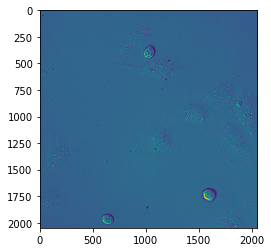

In [5]:
plt.imshow(image)

In [6]:
print(np.max(image))
print(np.min(image))

25745
1984


In [132]:
image = skimage.color.grey2rgb(image)

In [99]:
class CellInferenceConfig(cellConfig):
    # Set batch size to 1 to run one image at a time
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    # Don't resize imager for inferencing
    IMAGE_RESIZE_MODE = "pad64"
    # Non-max suppression threshold to filter RPN proposals.
    # You can increase this during training to generate more propsals.
    RPN_NMS_THRESHOLD = 0.7

In [133]:
config = CellInferenceConfig()
model = modellib.MaskRCNN(mode="inference", config=config, model_dir=DATA_DIR)
model_path_1 = 'trained_network/Usiigaci_1.h5'
model.load_weights(model_path_1, by_name=True)

In [134]:
r = model.detect([image], verbose=0)[0]

In [136]:
r

{'class_ids': array([], dtype=int32),
 'masks': array([], shape=(28, 28, 0), dtype=float64),
 'rois': array([], shape=(0, 4), dtype=int32),
 'scores': array([], dtype=float32)}

In [ ]:
plt.imshow(mask)
cv2.imwrite('./out.png', mask)

In [73]:
mask_array = []
for image in images:
    print(image)
    image = skimage.io.imread(os.path.join(DATA_DIR, image))
    image = image*16
    image = skimage.color.grey2rgb(image)
    r = model.detect([image], verbose=0)[0]
    mask_array.append(np.argmax(r['masks'], 2))

exp1_F0001-00001-Copy1.tif
exp1_F0001-00002-Copy1.tif
exp1_F0001-00003-Copy1.tif
exp1_F0001-00004-Copy1.tif
exp1_F0001-00005-Copy1.tif
exp1_F0001-00006-Copy1.tif
exp1_F0001-00007-Copy1.tif
exp1_F0001-00008-Copy1.tif
exp1_F0001-00009-Copy1.tif
exp1_F0001-00010-Copy1.tif
exp1_F0001-00011-Copy1.tif
exp1_F0001-00012-Copy1.tif
exp1_F0001-00013-Copy1.tif
exp1_F0001-00014-Copy1.tif
exp1_F0001-00015-Copy1.tif
exp1_F0001-00016-Copy1.tif
exp1_F0001-00017-Copy1.tif
exp1_F0001-00018-Copy1.tif
exp1_F0001-00019-Copy1.tif
exp1_F0001-00020-Copy1.tif
exp1_F0001-00021-Copy1.tif
exp1_F0001-00022-Copy1.tif
exp1_F0001-00023-Copy1.tif
exp1_F0001-00024-Copy1.tif
exp1_F0001-00025-Copy1.tif
exp1_F0001-00026-Copy1.tif
exp1_F0001-00027-Copy1.tif
exp1_F0001-00028-Copy1.tif
exp1_F0001-00029-Copy1.tif
exp1_F0001-00030-Copy1.tif
exp1_F0001-00031-Copy1.tif
exp1_F0001-00032-Copy1.tif
exp1_F0001-00033-Copy1.tif
exp1_F0001-00034-Copy1.tif
exp1_F0001-00035-Copy1.tif
exp1_F0001-00036-Copy1.tif
exp1_F0001-00037-Copy1.tif
e

In [82]:
mask_array[0].shape
height, width =mask_array[0].shape
size= (width, height)

In [87]:
mask_array[0]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [83]:
import cv2
file_name='maskout.avi'

In [84]:
out = cv2.VideoWriter(file_name,cv2.VideoWriter_fourcc(*'DIVX'), 10, size)

TypeError: Expected Ptr<cv::UMat> for argument 'image'

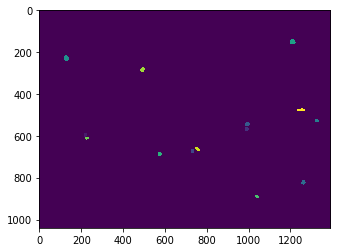

In [86]:
for img in mask_array:
    img = plt.imshow(img)
    out.write(img)
out.release()